## Fill me in here

In [1]:
import Pkg; Pkg.activate("."); Pkg.resolve(); Pkg.instantiate();

  Activating project at `~/Desktop/julia_work/CHEME-1800-4800-Course-Repository-S23/examples/gaussian_elimination`
  No Changes to `~/Desktop/julia_work/CHEME-1800-4800-Course-Repository-S23/examples/gaussian_elimination/Project.toml`
  No Changes to `~/Desktop/julia_work/CHEME-1800-4800-Course-Repository-S23/examples/gaussian_elimination/Manifest.toml`


In [2]:
# load external packages
using Plots
using Colors

In [3]:
# load the file for this project
include("Include.jl");

### Constants

In [4]:
# setup constants for the problem -
h = 0.1; # step-size
κ = 0.5;  # rate constant
Cₒ = 10.0; # initial condition

# setup my time array -
T_stop = 20.0;
T_array = range(0.0, stop = T_stop, step=h) |> collect;
N = length(T_array); # how many time steps do we have?

In [15]:
N

201

### Build system of equations

In [6]:
# build the matrix A -
A = zeros(N,N); 

# the first row has one entry at 1,1
A[1,1] = 1.0;

# process each row from 2 -> N
for i ∈ 2:N
    
    A[i,i] = 1.0 # the main diag is 1
    A[i,i-1] = (κ*h - 1);
end

In [7]:
# build right-hand-side vector 
b = zeros(N);
b[1] = Cₒ*(1-κ*h);

### Solve system of equations

In [8]:
Ā = [A b]

201×202 Matrix{Float64}:
  1.0    0.0    0.0    0.0    0.0    0.0   …   0.0    0.0    0.0   0.0  9.5
 -0.95   1.0    0.0    0.0    0.0    0.0       0.0    0.0    0.0   0.0  0.0
  0.0   -0.95   1.0    0.0    0.0    0.0       0.0    0.0    0.0   0.0  0.0
  0.0    0.0   -0.95   1.0    0.0    0.0       0.0    0.0    0.0   0.0  0.0
  0.0    0.0    0.0   -0.95   1.0    0.0       0.0    0.0    0.0   0.0  0.0
  0.0    0.0    0.0    0.0   -0.95   1.0   …   0.0    0.0    0.0   0.0  0.0
  0.0    0.0    0.0    0.0    0.0   -0.95      0.0    0.0    0.0   0.0  0.0
  0.0    0.0    0.0    0.0    0.0    0.0       0.0    0.0    0.0   0.0  0.0
  0.0    0.0    0.0    0.0    0.0    0.0       0.0    0.0    0.0   0.0  0.0
  0.0    0.0    0.0    0.0    0.0    0.0       0.0    0.0    0.0   0.0  0.0
  0.0    0.0    0.0    0.0    0.0    0.0   …   0.0    0.0    0.0   0.0  0.0
  0.0    0.0    0.0    0.0    0.0    0.0       0.0    0.0    0.0   0.0  0.0
  0.0    0.0    0.0    0.0    0.0    0.0       0.0    0.0    0.

In [9]:
det(A)

1.0

In [10]:
Ū = upper_triangular(Ā);

In [11]:
U = Ū[:,1:end-1];
b̂ = Ū[:,end];

In [12]:
x = backward_substitution(U,b̂);
x̂ = [Cₒ ; x[1:end-1]];

### Compare estimated versus analytical solution

In [13]:
# generate analytical solution -
T_array_soln = range(0,stop=T_stop,step=0.01) |> collect;
C_soln = zeros(length(T_array_soln));
C_soln[1] = Cₒ
for i ∈ 2:length(T_array_soln)
    C_soln[i] = Cₒ*exp(-κ*T_array_soln[i])
end

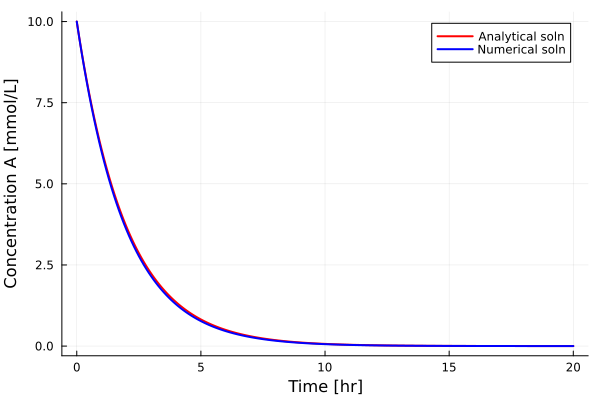

In [14]:
plot(T_array_soln, C_soln,c=:red,lw=2, label="Analytical soln")
plot!(T_array, x̂, c=:blue,lw=2, label="Numerical soln")
xlabel!("Time [hr]", fontsize=18)
ylabel!("Concentration A [mmol/L]", fontsize=18)